In [1]:
import os 

os.chdir("..")

import numpy as np
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tscluster.opttscluster import OptTSCluster
from tscluster.tskmeans import TSKmeans, TSGlobalKmeans
from tscluster.preprocessing import utils as preprocess_utils, TSStandardScaler, TSMinMaxScaler
from tscluster.metrics import inertia, max_dist
from tscluster.tsplot import tsplot as tsp

In [2]:
os.chdir("./test/sample_data")

In [3]:
X_mini = np.load("./sythetic_data.npy")

In [4]:
kc_opt_model = OptTSCluster(3, random_state=42, use_full_constraints=1, warm_start=1, 
                          scheme='z1c1', n_allow_assignment_change=None,
                             use_MILP_centroid=True, is_tight_constraints=False, is_Z_positive=True,
                             init_with_prev=False, use_sum_distance=False)

kc_opt_model.fit(X_mini, verbose=True)

Warm starting...
Done with warm start after 0.11secs

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-18

100.0% of data used
Done with 1 of 1. Ehat: [1.52196375], Estar: [1.52196375]

Total time is 0.46secs



In [5]:
print(f"inertia score is {inertia('./sythetic_data.npy', kc_opt_model.cluster_centers_, kc_opt_model.labels_, ord=1)}")
print(f"max_dist score is {max_dist('./sythetic_data.npy', kc_opt_model.cluster_centers_, kc_opt_model.labels_, ord=1)}")
print(f"shape of labels_ is {kc_opt_model.labels_.shape}")
print("head of labels_ is:")
print(kc_opt_model.labels_[:5, :])

print(f"shape of cluster_centers_ is {kc_opt_model.cluster_centers_.shape}")
print("head of cluster_centers_ is:")

if len(kc_opt_model.cluster_centers_.shape) == 3:
    print(kc_opt_model.cluster_centers_[:5, :, :])
else:
    print(kc_opt_model.cluster_centers_)

inertia score is 214.40647069697624
max_dist score is 1.5219637544500682
shape of labels_ is (30, 10)
head of labels_ is:
[[2 2 2 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1 2]
 [2 0 0 2 0 0 0 0 0 0]
 [1 2 0 1 1 1 1 1 1 2]]
shape of cluster_centers_ is (10, 3, 1)
head of cluster_centers_ is:
[[[ 8.3640779 ]
  [15.38092986]
  [ 9.87721949]]

 [[11.50046295]
  [10.04978372]
  [ 9.40500694]]

 [[ 9.45626162]
  [ 9.41879279]
  [10.36034458]]

 [[10.68152685]
  [ 6.15811016]
  [10.68152685]]

 [[ 8.58872533]
  [ 5.36710865]
  [12.27555051]]]


In [6]:
kc_opt_model.get_named_labels(
    time=['t'+str(t) for t in range(kc_opt_model.fitted_data_shape_[0])], 
    entities=['e'+str(e) for e in range(kc_opt_model.fitted_data_shape_[1])]
).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
e0,2,2,2,2,2,2,2,2,2,2
e1,1,1,1,1,1,1,1,1,1,1
e2,1,2,1,1,1,1,1,1,1,2
e3,2,0,0,2,0,0,0,0,0,0
e4,1,2,0,1,1,1,1,1,1,2


In [7]:
centers = kc_opt_model.get_named_cluster_centers(
    time=['t'+str(t) for t in range(kc_opt_model.fitted_data_shape_[0])], 
    features=['f'+str(f) for f in range(kc_opt_model.fitted_data_shape_[2])]
)
len(centers)

3

In [8]:
centers[0]

,f0
t0,8.364078
t1,11.500463
t2,9.456262
t3,10.681527
t4,8.588725
t5,11.339732
t6,8.403033
t7,11.649322
t8,8.134154
t9,12.781047


In [9]:
centers[1]

,f0
t0,15.380930
t1,10.049784
t2,9.418793
t3,6.158110
t4,5.367109
t5,5.464376
t6,6.618689
t7,9.106237
t8,11.315930
t9,13.775484


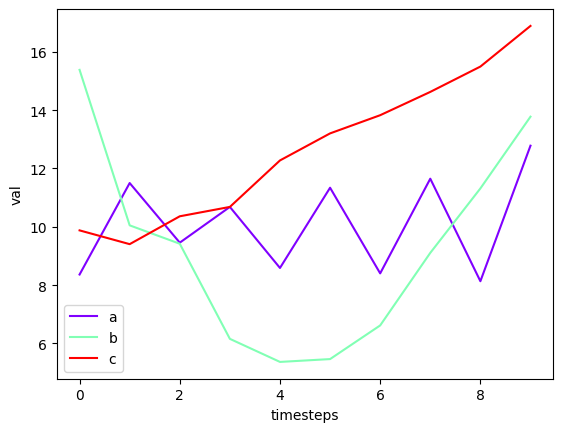

In [32]:
tsp.plot(X=None, cluster_centers=kc_opt_model.cluster_centers_, labels=None, cluster_labels=['a', 'b', 'c'])

In [11]:
X = random_walks(n_ts=50, sz=32, d=2, random_state=42)
Xt = preprocess_utils.ntf_to_tnf(X)

In [12]:
km = TSKmeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X, arr_format="NTF")
print(km.Xt.shape)
print(km.labels_)
print(len(km.labels_))
print(km.cluster_centers_.shape)
print(km.cluster_centers_[0, :5, :])
print()

(50, 32, 2)
[1 0 2 0 1 1 2 1 1 0 2 2 1 0 0 1 1 1 2 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 2 1 1 2 1]
50
(32, 3, 2)
[[ 0.07999396  0.35317914]
 [ 0.19301267 -0.05467002]
 [-0.74667991  0.01571665]]



In [13]:
km.get_named_labels(time=['t'+str(t) for t in range(km.fitted_data_shape_[0])], entities=['e'+str(e) for e in range(km.fitted_data_shape_[1])]).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31
e0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
km2 = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0).fit(X)
print(km2.labels_)
print(len(km2.labels_))
print(km2.cluster_centers_[:5, 0, :])

[1 0 2 0 1 1 2 1 1 0 2 2 1 0 0 1 1 1 2 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 2 1 1 2 1]
50
[[ 0.07999396  0.35317914]
 [ 0.19301267 -0.05467002]
 [-0.74667991  0.01571665]]


In [15]:
km3 = TSGlobalKmeans(n_clusters=3)
km3.fit(Xt)
print(km3.labels_)
print(km3.labels_.shape)

[[2 0 0 ... 2 2 2]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 2 2 2]]
(50, 32)


In [16]:
km3.get_named_labels(
    time=['t'+str(t) for t in range(km3.fitted_data_shape_[0])], 
    entities=['e'+str(e) for e in range(km3.fitted_data_shape_[1])]
).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31
e0,2,0,0,1,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e2,2,2,2,0,2,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
e3,2,2,2,2,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
e4,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [17]:
centers = km3.get_named_cluster_centers(
    time=['t'+str(t) for t in range(km3.fitted_data_shape_[0])], 
    features=['f'+str(f) for f in range(km3.fitted_data_shape_[2])]
)
len(centers)

3

In [18]:
centers[0].head()

,f0,f1
t0,-1.219054,4.516501
t1,-1.219054,4.516501
t2,-1.219054,4.516501
t3,-1.219054,4.516501
t4,-1.219054,4.516501


In [19]:
print("Z score")

print("per_time =True")

scaler = TSStandardScaler(per_time=True)
scaler.fit(X, arr_format='NTF')
X_scaled = scaler.transform(X, arr_format='NTF',) 
print(f"Zscore X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

Z score
per_time =True
Zscore X_scaled shape is (32, 50, 2)
[[ 0.53997391 -0.24777653]
 [ 0.89657801  1.24279008]
 [ 0.09162373 -0.61202562]
 [ 0.22084828 -1.35233303]
 [ 1.40965491 -0.81568142]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [20]:
sk_scaler = StandardScaler()
print(sk_scaler.fit_transform(Xt[0])[:5])

print("per_time = False")

scaler = TSStandardScaler(per_time=False)
X_scaled = scaler.fit_transform(Xt)
print(f"Zscore X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[ 0.53997391 -0.24777653]
 [ 0.89657801  1.24279008]
 [ 0.09162373 -0.61202562]
 [ 0.22084828 -1.35233303]
 [ 1.40965491 -0.81568142]]
per_time = False
Zscore X_scaled shape is (32, 50, 2)
[[ 0.14294426 -0.18959971]
 [ 0.22135297  0.16679301]
 [ 0.04436277 -0.27669125]
 [ 0.07277616 -0.45369788]
 [ 0.33416631 -0.32538511]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [21]:
sk_scaler = StandardScaler()
print(sk_scaler.fit_transform(np.vstack(Xt))[:5])


print("MinMax")

print("per_time =True")

scaler = TSMinMaxScaler(per_time=True)
X_scaled = scaler.fit_transform(Xt)
print(f"MinMax X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[ 0.14294426 -0.18959971]
 [ 0.22135297  0.16679301]
 [ 0.04436277 -0.27669125]
 [ 0.07277616 -0.45369788]
 [ 0.33416631 -0.32538511]]
MinMax
per_time =True
MinMax X_scaled shape is (32, 50, 2)
[[0.64596382 0.379006  ]
 [0.72055504 0.66472828]
 [0.55218198 0.30918417]
 [0.57921201 0.16727684]
 [0.82787582 0.27014599]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [22]:
sk_scaler = MinMaxScaler()
print(sk_scaler.fit_transform(Xt[0])[:5])

print("per_time = False")

scaler = TSMinMaxScaler(per_time=False)
X_scaled = scaler.fit_transform(Xt)
print(f"MinMax X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[0.64596382 0.379006  ]
 [0.72055504 0.66472828]
 [0.55218198 0.30918417]
 [0.57921201 0.16727684]
 [0.82787582 0.27014599]]
per_time = False
MinMax X_scaled shape is (32, 50, 2)
[[0.43439912 0.483141  ]
 [0.44533096 0.53998866]
 [0.42065476 0.46924917]
 [0.42461619 0.44101511]
 [0.46105953 0.46148208]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [23]:
sk_scaler = MinMaxScaler()
print(sk_scaler.fit_transform(np.vstack(Xt))[:5])

scaler = TSMinMaxScaler(per_time=False)
print()
print("trying fit(str) for csv")
Xt = scaler.fit_transform("./synthetic_csv")
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])

[[0.43439912 0.483141  ]
 [0.44533096 0.53998866]
 [0.42065476 0.46924917]
 [0.42461619 0.44101511]
 [0.46105953 0.46148208]]

trying fit(str) for csv
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [24]:
print()
print("trying fit(str) for json")
Xt = scaler.fit_transform("./synthetic_json")
print(Xt[0, :5, :])
print("Inverse tranform for json")
print(scaler.inverse_transform(Xt)[0, :5, :])


trying fit(str) for json
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for json
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [25]:
print()
print("trying fit(str) for npy")
Xt = scaler.fit_transform("./synthetic_npy")
print(Xt[0, :5, :])
print("Inverse tranform for npy")
print(scaler.inverse_transform(Xt)[0, :5, :])


trying fit(str) for npy
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for npy
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [26]:
print()
print("trying fit(lst) for csv")
file_list = [
    "./synthetic_csv/timestep_0.csv",
    "./synthetic_csv/timestep_1.csv",
    "./synthetic_csv/timestep_2.csv",
    "./synthetic_csv/timestep_3.csv",
    "./synthetic_csv/timestep_4.csv"
]


trying fit(lst) for csv


In [27]:
scaler.fit(file_list, read_file_args={'header': 0, 'sep': ","})
Xt = scaler.transform(file_list, read_file_args={'header': None, 'sep': ","})
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])

[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [28]:
print()
print("fit_transform")
# scaler.fit(file_list, read_file_args={'header': None, 'sep': ","})
Xt = scaler.fit_transform(file_list, read_file_args={'header': None, 'sep': ","})
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])


fit_transform
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]
